Nim examples, and notes on this kernel
======================================

Hello World
-----------

In [1]:
echo "hello world!"

hello world!


Notes on globals level
--------------------------------------------
For now, every block is a chunk, and the file compiled is created by appending all chunks up to the running cell.  
This has the side effect of re-running top level instructions.  
As a convenience, the output before the last run cell is discarded, but other instructions are still run, so eg. sideeffects like creating files etc might be run multiple times.

Some random code
--------------------

Lets define a var `x`.

In [2]:
var x = 12.3

In [3]:
echo x

12.3


Nice, works.

Import
------------
If the host system as the correct package installed, you can use `import` like normal.  
Note that files in the working directory of the notebook are not picked up, because the compilation happens in a temp folder (TODO; PR welcome (eg. a macro that change `import ./someimport` to an absolute `import C:\...\someimport`)

In [4]:
import math
x = 5.0
echo x.pow(2.0)

25.0


In [5]:
import sequtils
var s : seq[char] = toSeq("hello notebook!".items)
var z : seq[char] = toSeq("!koobeton olleh".items)
echo zip(s,z)

@[('h', '!'), ('e', 'k'), ('l', 'o'), ('l', 'o'), ('o', 'b'), (' ', 'e'), ('n', 't'), ('o', 'o'), ('t', 'n'), ('e', ' '), ('b', 'o'), ('o', 'l'), ('o', 'l'), ('k', 'e'), ('!', 'h')]


Show the tempfile name
----------------------
Show tempfile name for this cell which happens to be the module name and therefor has a limited charset


In [6]:
template FILE: string = instantiationInfo().filename

echo "Module tempfile: '" & FILE() & "'"

Module tempfile: 'codecells.nim'


### Simple procs

In [7]:
proc fakesquare(x:int):int =
    result = x*x+1

echo fakesquare(5)

26


### Json parsing

In [8]:
import json
 
var data = parseJson("""{ "foo": 1, "bar": [10, "apples"] }""")
echo data["foo"]
echo data["bar"]
 
var js = %[%{"name": %"John", "age": %30}, %{"name": %"Susan", "age": %31}]
echo js

1
[10,"apples"]
[{"name":"John","age":30},{"name":"Susan","age":31}]


jupyternimpkg/display
--------------
The module `jupyternimpkg/display` (will) implement utilities to send data back to the kernel for formatted displaying.

For example, showing a png:

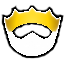

#<jndd>##<outjndd>#


In [9]:
import nimPNG, jupyternimpkg/display

#needs absolute path, nimPNG is a little unwieldy
# TODO: rewrite as a macro so that syntax is
# show kind, [w, h]?:
#   what
# with [w, h] optional and proper dispatching to impls
let file = r"C:\\Users\stisa\\.nimble\\pkgs\\jupyternim-0.5.1\\jupyternimspec\\logo-64x64.png"
show dkPngFile, [64, 64]:
    file

TODO: reimplement: Plotting with pyplot
-----------

A naive wrapper around a small subset of matplotlib is available.

In [10]:
#>inlineplot
import math,sequtils

iterator linsp*[T](fm,to,step:T):T =
    if fm<to:
      var res: T = T(fm)
      while res<=to:
        yield res
        res+=step
    elif fm>to:
      var res: T = T(fm)
      while res>=to:
        yield res
        res-=step
    else:
      yield fm
    

proc linspace* [T](fm,to,step:T):seq[T] = toSeq(linsp(fm, to, step)) # Result and step should be same type, not all 4


proc sin (x:openarray[float]):seq[float] =
  result = map(x) do (x:float)->float : 
    sin(x)

let xx = linspace(0.0,2*Pi,0.01)

show:
    plot(xx,sin(xx))
    title(r"Sin(x) for $0\leq x\leq 2\pi$" )

C:\Users\stisa\.jupyternim\codecells.nim(67, 5) Error: undeclared identifier: 'plot'


Basic histograms are also supported.

In [11]:
#>inlineplot
import math, random, sequtils

# simulate a standard normal deviate
proc normal(): float =
  var q, v, u, x, y = 100.0
  while (q > 0.27597 and (q > 0.27846 or v * v > -4 * ln(u) * u * u)):
    u = random(1.0)
    v = 1.7156 * (random(1.0) - 0.5)
    x = u - 0.449871
    y = abs(v) + 0.386595
    q = x * x + y * (0.19600 * y - 0.25472 * x)
  return v / u
  
let samples = newSeqWith(10000, normal())

show:
    hist(samples, bins=50)
    title(r"$x \sim N(0, 1)$" )

C:\Users\stisa\.jupyternim\codecells.nim(47, 9) Error: undeclared identifier: 'random'
